In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trytry/Database.csv
/kaggle/input/trytry/red_cols.csv
/kaggle/input/trytry/final_ct.csv
/kaggle/input/trytry/df_ct.csv


# Importing libraries + Datset + Variable identification and typecasting.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Filter out any warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/trytry/final_ct.csv')

df.dropna(inplace=True)


location = ['Latitude', 'Longitude']
grow_time = [ 'Harvest year', 'Sowing month','Harvesting month']
environmental = ['P', 'E', 'PB', 'Tave']
categorical_cols = ['Crop', 'Fertilization CT ', 'N input', 'ST']


def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = [mean-st_dev, mean+st_dev]

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x = points, y = [0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))



import seaborn as sns
import matplotlib.pyplot as plt

def UVA_category(data, var_group):
    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print all the value_counts and barplot.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize=(7*size, 5), dpi=100)

    # for every variable
    for j, i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        # Plotting the variable with every information
        plt.subplot(1, size, j + 1)
        sns.barplot(x=norm_count, y=norm_count.index, order=norm_count.index)
        plt.xlabel('fraction/percent', fontsize=20)
        plt.ylabel('{}'.format(i), fontsize=20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni, norm_count))

    plt.show()

# Example usage:
# Assuming 'data' is your DataFrame and 'var_group' is a list of column names
# UVA_category(data, var_group)




# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))



trimmed_df = df.copy()

import matplotlib.pyplot as plt

def UVA_outlier_remove(data, var_group, trimmed_df):
    size = len(var_group)
    plt.figure(figsize=(7*size, 4), dpi=100)
    for i in var_group:
        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25 - (1.5 * IQR)
        whis_high = quant75 + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i] > whis_high])
        outlier_low = len(data[i][data[i] < whis_low])

        # Filtering outliers from trimmed_df
        trimmed_df = trimmed_df[(trimmed_df[i] < whis_high) & (trimmed_df[i] > whis_low)]
    return trimmed_df


trimmed_df = UVA_outlier_remove(df, environmental, trimmed_df)

trimmed_df = UVA_outlier_remove(trimmed_df, location, trimmed_df)

trimmed_df = UVA_outlier_remove(trimmed_df, grow_time, trimmed_df)

<Figure size 2800x400 with 0 Axes>

<Figure size 1400x400 with 0 Axes>

<Figure size 2100x400 with 0 Axes>

In [4]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
target = ['Yield of CT']
df = trimmed_df
df.rename(columns={'Yield of CT': 'Yield'}, inplace=True)
df.shape
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)
one_hot_encoded_df.dtypes
SEED = 42

# Selecting features (X) and target (y)
# Extracting features (X)
predictorVars = one_hot_encoded_df.drop(columns=['Yield'])
# Extracting target variable (y)
targetVar = one_hot_encoded_df['Yield']

# Splitting the dataset into train and test sets (80% train, 20% test)
X_train,X_test,Y_train,Y_test = train_test_split(predictorVars, targetVar, test_size=0.2, random_state=SEED)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
def plot_predictions_vs_truevals(predictions,y_test):    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions, color='blue', label='Predictions vs True Values')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('Predictions vs True Values')
    plt.legend()
    plt.grid(True)
    plt.show()

# Model : Random Forest

## 1. Scikit-Learn

In [6]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Without Specifying any hyper-parameter

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
model = RandomForestRegressor(
    random_state=SEED          # Random seed for reproducibility
)

In [8]:
rmse_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')

In [9]:
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()

In [10]:
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)


Average Root Mean Squared Error: 1798.9971411054455
Average r2_score: 0.7668171374615503


### Specifying Hyper-Parameters


#### 1. Max Depth

In [11]:
model = RandomForestRegressor(random_state=SEED,max_depth = 10)
rmse_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)

Average Root Mean Squared Error: 1887.889245041922
Average r2_score: 0.7431819827084848


#### 2. Min Samples before Split

In [12]:
model = RandomForestRegressor(random_state=SEED,min_samples_split = 20)
rmse_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)

Average Root Mean Squared Error: 1902.8658457987992
Average r2_score: 0.738765414435544


#### 3.Minimum samples in leaf node

In [13]:
model = RandomForestRegressor(random_state=SEED,min_samples_leaf = 20)
rmse_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)

Average Root Mean Squared Error: 2199.5103871096435
Average r2_score: 0.6510290314311471


#### 4.Number of trees

In [14]:
model = RandomForestRegressor(random_state=SEED,n_estimators = 5)
rmse_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)

Average Root Mean Squared Error: 1969.2834665694984
Average r2_score: 0.7203990300141652


### HyperParameter Tuning

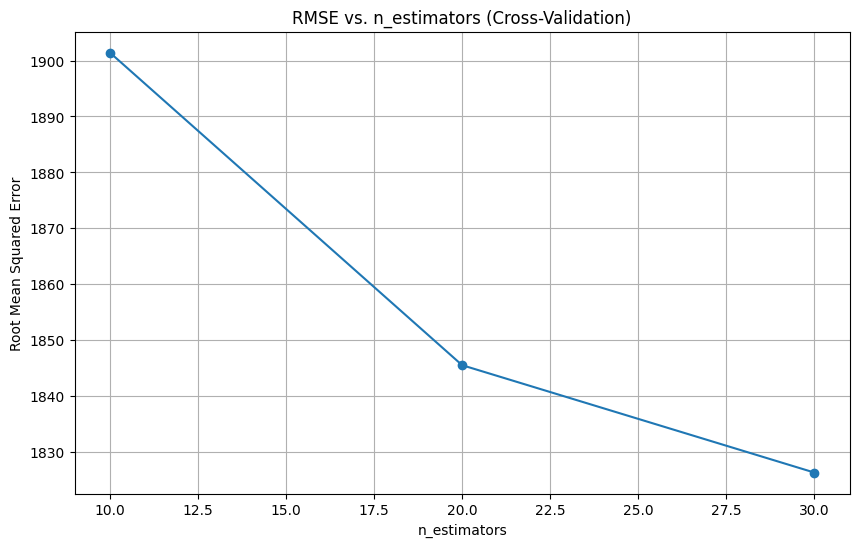

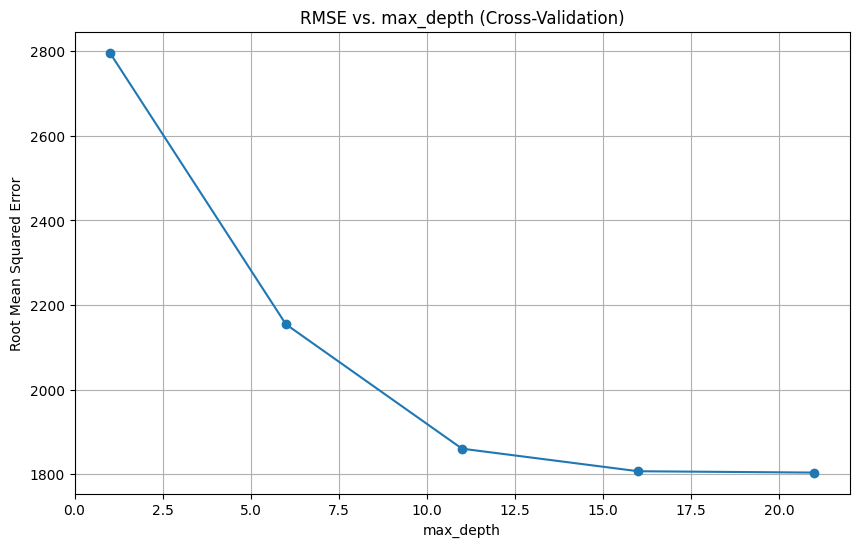

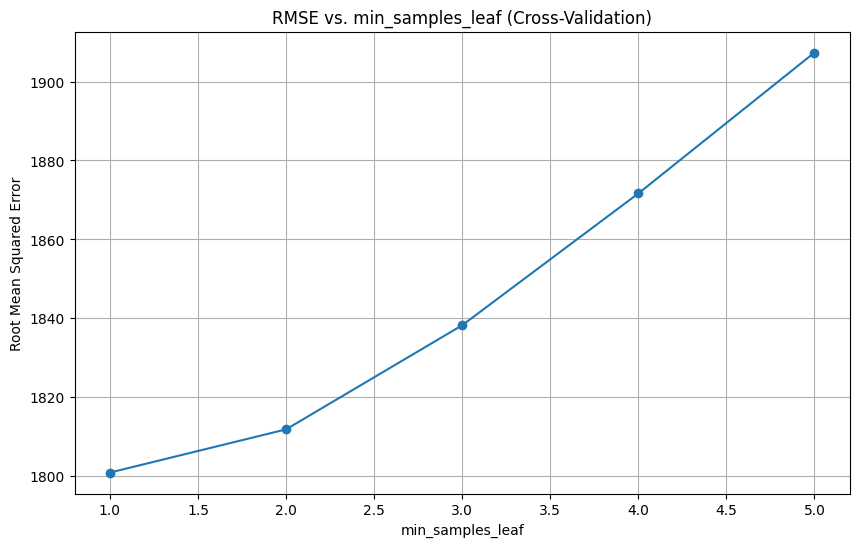

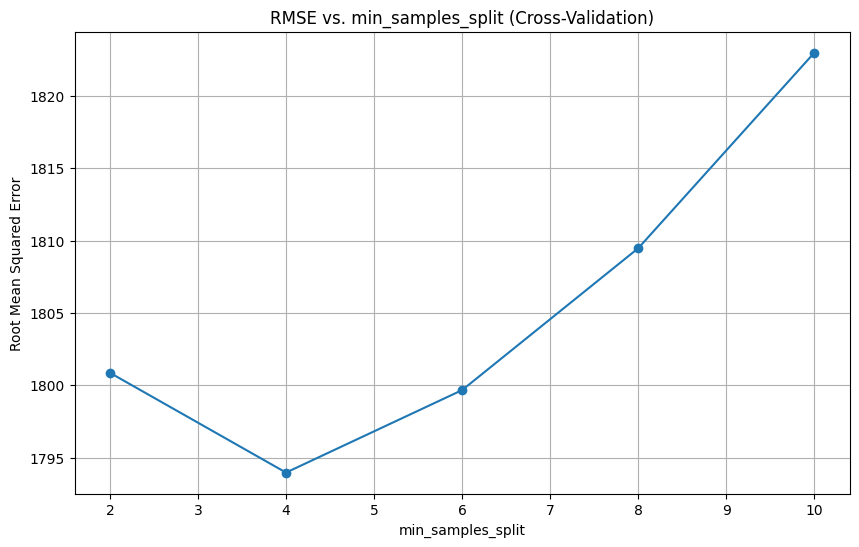

In [15]:
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Define the range of values for n_estimators, max_depth, min_samples_leaf, and min_samples_split
n_estimators_values = range(10, 31, 10)
max_depths = range(1,26,5)
min_samples_leaf_values = range(1,6)
min_samples_split_values = range(2,11,2)

# Initialize lists to store RMSE values
rmse_values_estimators = []
rmse_values_depth = []
rmse_values_leaf = []
rmse_values_split = []

# Perform cross-validation for n_estimators
for n_estimators in n_estimators_values:
    forest = RandomForestRegressor(n_estimators=n_estimators, random_state=SEED)
    scores = cross_val_score(forest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_values_estimators.append(np.sqrt(-scores.mean()))

# Perform cross-validation for max_depth
for depth in max_depths:
    forest = RandomForestRegressor(max_depth=depth, random_state=SEED)
    scores = cross_val_score(forest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_values_depth.append(np.sqrt(-scores.mean()))

# Perform cross-validation for min_samples_leaf
for min_leaf in min_samples_leaf_values:
    forest = RandomForestRegressor(min_samples_leaf=min_leaf, random_state=SEED)
    scores = cross_val_score(forest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_values_leaf.append(np.sqrt(-scores.mean()))

# Perform cross-validation for min_samples_split
for min_split in min_samples_split_values:
    forest = RandomForestRegressor(min_samples_split=min_split, random_state=SEED)
    scores = cross_val_score(forest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_values_split.append(np.sqrt(-scores.mean()))

# Plot RMSE values against n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_values_estimators, marker='o', linestyle='-')
plt.title('RMSE vs. n_estimators (Cross-Validation)')
plt.xlabel('n_estimators')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

# Plot RMSE values against max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depths, rmse_values_depth, marker='o', linestyle='-')
plt.title('RMSE vs. max_depth (Cross-Validation)')
plt.xlabel('max_depth')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

# Plot RMSE values against min_samples_leaf
plt.figure(figsize=(10, 6))
plt.plot(min_samples_leaf_values, rmse_values_leaf, marker='o', linestyle='-')
plt.title('RMSE vs. min_samples_leaf (Cross-Validation)')
plt.xlabel('min_samples_leaf')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

# Plot RMSE values against min_samples_split
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, rmse_values_split, marker='o', linestyle='-')
plt.title('RMSE vs. min_samples_split (Cross-Validation)')
plt.xlabel('min_samples_split')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()


In [16]:
min_depth_indices = np.argsort(rmse_values_depth)[:3]
min_leaf_indices = np.argsort(rmse_values_leaf)[:3]
min_split_indices = np.argsort(rmse_values_split)[:3]
min_n_estimator_indices = np.argsort(rmse_values_estimators)[:3]
# Print the indices for which minimum RMSE values are achieved
print("Indices for minimum RMSE values for max_depth:", min_depth_indices)
print("Indices for minimum RMSE values for min_samples_leaf:", min_leaf_indices)
print("Indices for minimum RMSE values for min_samples_split:", min_split_indices)
print("Indices for minimum RMSE values for min_n_estimator_indices:", min_n_estimator_indices)

Indices for minimum RMSE values for max_depth: [4 3 2]
Indices for minimum RMSE values for min_samples_leaf: [0 1 2]
Indices for minimum RMSE values for min_samples_split: [1 2 0]
Indices for minimum RMSE values for min_n_estimator_indices: [2 1 0]


In [17]:
min_depth_values = [max_depths[i] for i in min_depth_indices[:3]]
print("Values for max_depth with minimum RMSE:", min_depth_values)

# Find the corresponding values for min_samples_leaf
min_leaf_values_depth = [min_samples_leaf_values[i] for i in min_leaf_indices[:3]]
print("Corresponding values for min_samples_leaf:", min_leaf_values_depth)

# Find the corresponding values for min_samples_split
min_split_values_depth = [min_samples_split_values[i] for i in min_split_indices[:3]]
print("Corresponding values for min_samples_split:", min_split_values_depth)

# Find the corresponding values for n_estimators
min_n_estimator_values_depth = [n_estimators_values[i] for i in min_n_estimator_indices[:3]]
print("Corresponding values for n_estimators:", min_n_estimator_values_depth)

Values for max_depth with minimum RMSE: [21, 16, 11]
Corresponding values for min_samples_leaf: [1, 2, 3]
Corresponding values for min_samples_split: [4, 6, 2]
Corresponding values for n_estimators: [30, 20, 10]


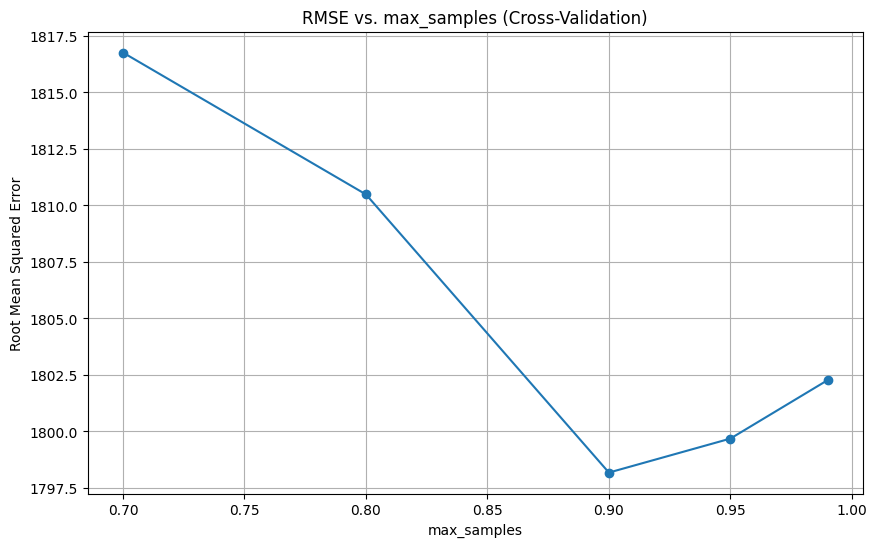

In [18]:
max_samples_values = [ 0.7,0.8,0.9,0.95,0.99]  # Subsample size values
rmse_values_max_samples = []
# Perform cross-validation for max_samples
for max_samples in max_samples_values:
    forest = RandomForestRegressor(max_samples=max_samples, random_state=SEED)
    scores = cross_val_score(forest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_values_max_samples.append(np.sqrt(-scores.mean()))
# Plot RMSE values against max_samples
plt.figure(figsize=(10, 6))
plt.plot(max_samples_values, rmse_values_max_samples, marker='o', linestyle='-')
plt.title('RMSE vs. max_samples (Cross-Validation)')
plt.xlabel('max_samples')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

### Using above information to shrink sample space

In [20]:
dt = RandomForestRegressor(random_state=SEED)

In [21]:
params = {
    'max_depth': min_depth_values,
    'min_samples_leaf': min_leaf_values_depth,
    'min_samples_split': min_split_values_depth,
    'n_estimators' : min_n_estimator_values_depth  
}

In [22]:
gs = GridSearchCV(dt,param_grid = params,scoring='neg_root_mean_squared_error',cv=5)

In [23]:
gs.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [21, 16, 11],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [4, 6, 2],
                         'n_estimators': [30, 20, 10]},
             scoring='neg_root_mean_squared_error')

In [24]:
gs.cv_results_['rank_test_score']

array([ 1, 12, 38,  2, 16, 47,  5, 21, 65,  6, 14, 43,  9, 19, 49,  6, 14,
       43, 25, 28, 67, 25, 28, 67, 25, 28, 67,  3, 18, 46,  4, 17, 48,  8,
       24, 64, 10, 22, 52, 13, 20, 55, 10, 22, 52, 31, 34, 70, 31, 34, 70,
       31, 34, 70, 37, 63, 76, 45, 62, 77, 41, 66, 78, 39, 50, 73, 42, 54,
       75, 39, 50, 73, 59, 56, 79, 59, 56, 79, 59, 56, 79], dtype=int32)

In [25]:
gs.best_estimator_

RandomForestRegressor(max_depth=21, min_samples_split=4, n_estimators=30,
                      random_state=42)

In [26]:
Min_samples_leaf = gs.best_estimator_.min_samples_leaf
Min_samples_split = gs.best_estimator_.min_samples_split
Max_depth = gs.best_estimator_.max_depth
N_estimators = gs.best_estimator_.n_estimators

In [27]:
model = RandomForestRegressor(random_state=SEED,
                               n_estimators=N_estimators,
                               min_samples_leaf=Min_samples_leaf,
                               min_samples_split=Min_samples_split,
                               max_depth=Max_depth)
rmse_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_root_mean_squared_error')
r2_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='r2')
rmseValue = -rmse_scores.mean()
r2Score = r2_scores.mean()
print('Average Root Mean Squared Error:', rmseValue)
print('Average r2_score:', r2Score)

Average Root Mean Squared Error: 1821.7721043456647
Average r2_score: 0.76085314962883


### Looking at Feature Importance

In [32]:
# Assuming X_train is a NumPy array and you don't have access to column names directly
# Fit the decision tree model
model.fit(X_train, Y_train)

# Get feature importances
importances = model.feature_importances_

# Create a pandas Series with feature importances using numerical indices
num_features = X_train.shape[1]  # Number of features
feature_importance_series = pd.Series(importances, index=range(num_features))

# Sort the feature importances in descending order
sorted_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print(sorted_importances)


12    0.470568
1     0.114848
2     0.071222
0     0.069846
6     0.055745
8     0.053631
7     0.046776
5     0.035063
29    0.014492
3     0.008950
24    0.007899
23    0.007864
21    0.005821
4     0.005739
13    0.005254
11    0.004356
27    0.003628
15    0.003467
26    0.002741
18    0.002651
20    0.002055
14    0.001432
16    0.001353
28    0.001024
9     0.000990
22    0.000874
10    0.000636
19    0.000496
17    0.000406
25    0.000126
30    0.000047
dtype: float64


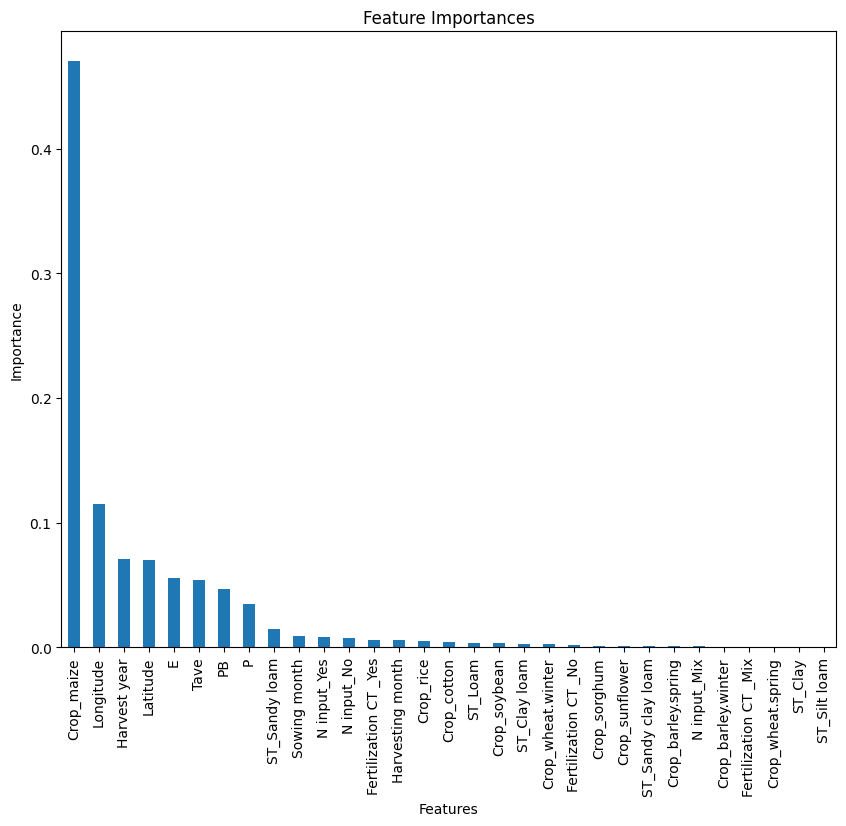

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already calculated feature importances and stored them in a pandas Series
feature_importances = pd.Series(model.feature_importances_, index=predictorVars.columns).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Testing Model on Test Data

In [34]:
tree = RandomForestRegressor(random_state=SEED,
                               n_estimators=N_estimators,
                               min_samples_leaf=Min_samples_leaf,
                               min_samples_split=Min_samples_split,
                               max_depth=Max_depth)
tree.fit(X_train, Y_train)
predictions = tree.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
print('r2_score:', metrics.r2_score(Y_test,predictions))

Mean Absolute Error: 1100.7285460549988
Mean Squared Error: 3074556.086047255
Root Mean Squared Error: 1753.441212600883
r2_score: 0.784510669054209


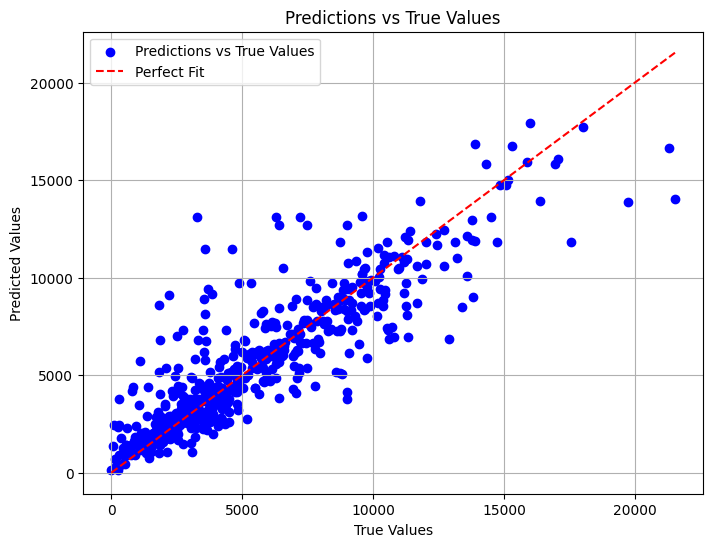

In [35]:
Y_pred_skit = predictions
plot_predictions_vs_truevals(Y_pred_skit,Y_test)

## 2. Self-Implementation

#### Decision Tree From Previous Implementation

In [59]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value
        
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, min_samples_leaf=1, max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
    
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if "var_red" in best_split and best_split["var_red"] > 0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                if len(best_split["dataset_left"]) >= self.min_samples_leaf and len(best_split["dataset_right"]) >= self.min_samples_leaf:
                    return Node(best_split["feature_index"], best_split["threshold"],left_subtree, right_subtree, var_red=best_split["var_red"])

        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
                
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
#     def make_prediction(self,X, ind, tree):
#             ''' function to predict new dataset '''

#             if tree.value is not None:
#                 return tree.value

#             if X.iloc[ind].iloc[tree.feature_index] <= tree.threshold:
#                 return self.make_prediction(X,ind, tree.left)
#             else:
#                 return self.make_prediction(X,ind, tree.right)




#     def predict(self, X):
#             ''' function to predict a single data point '''

#             predictions = [self.make_prediction(X,ind, self.root) for ind in range(X.shape[0])]
#             return predictions


In [ ]:
Y_train_reshaped = Y_train.values.reshape(-1, 1)

#### Random Forest

#### Parallel Processing of trees

In [66]:
import numpy as np
import pandas as pd
import multiprocessing
from scipy import stats

class RandomForest:
    '''
    A class that implements Random Forest algorithm from scratch.
    For more information, refer to https://towardsdatascience.com/master-machine-learning-random-forest-from-scratch-with-python-3efdd51b6d7a
    Parameters:
    ----------    
    num_tree: int, default=5
        The number of voting decision tree classifiers used for classification.
    subsample_size: float, default=None
        The proportion of the total training examples used to train each decision trees.
    max_depth: int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until, all leaves are the purest.
    max_features: int, float, default=None
        For each decision tree, at each split from parent node to child nodes, consider only 'max features' to find threshold split. 
        If float and <1, max_features take the proportion of the features in the dataset.
    bootstrap: bool, default=True
        Bootstrap sampling of training examples, with or without replacement. 
    random_state: int, default=None
        Controls the randomness of the estimator. The features are always randomly permuted at each split in each decision tree, 
        and bootstrap sampling is randomly permuted.
    '''
    def __init__(self, num_trees=5, subsample_size=None, max_depth=None, min_samples_split=None,min_samples_leaf=1, bootstrap=False, random_state=None):
        self.num_trees = num_trees
        self.subsample_size = subsample_size
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.min_samples_leaf = min_samples_leaf
        self.decision_trees = []
        self.bootstrap = bootstrap

    def sample(self, X, y, random_state):
        '''
        Helper function used for boostrap sampling.
        
        Parameters:
        ----------
        X: np.array, features
        y: np.array, target
        random_state: int, random bootstrap sampling
        Returns:
        -------
        sample of features: np.array, feature bootstrapped sample
        sample of target: np.array, corresponding target bootstrapped sample
        '''
        n_rows, n_cols = X.shape

        # Sample with replacement
        if self.subsample_size is None:
            sample_size = n_rows
        else:
            sample_size = int(n_rows*self.subsample_size)

        np.random.seed(random_state)
        samples = np.random.choice(a=n_rows, size=sample_size, replace=self.bootstrap)

        return X[samples], y[samples]


    def fit(self, X, y):
        '''
        Instantiates a trained Random Forest classifier object, with the corresponding rules stored as attributes in the nodes in each
        decision tree.
        
        Parameters:
        ----------
        X: np.array or pd.core.frame.DataFrame
            The set of feature variables of the training dataset
        y: np.array or pd.core.frame.DataFrame
            The target variable of the training dataset
        Returns:
        -------
        None
        '''
        # Reset
        if len(self.decision_trees) > 0:
            self.decision_trees = []

        if isinstance(X, pd.core.frame.DataFrame):
            X = X.values
        if isinstance(y, pd.core.series.Series):
            y = y.values
            
        # Function for parallelized training of a single tree
        def train_tree(tree_index):
            clf = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )
            # Obtain data sample
            _X, _y = self.sample(X, y, self.random_state + tree_index)
            # Train
            clf.fit(_X, _y)
            return clf

        # Build each tree of the forest in parallel
        num_cpus = multiprocessing.cpu_count()
        pool = multiprocessing.Pool(processes=num_cpus)
        self.decision_trees = pool.map(train_tree, range(self.num_trees))
        pool.close()
        pool.join()

        if self.random_state is not None:
            self.random_state += self.num_trees

    def predict(self, X):
            predictions = []
            for tree in self.decision_trees:
                predictions.append(tree.predict(X))
            
            # Calculate the average prediction across all trees
            avg_predictions = np.mean(predictions, axis=0)

            return avg_predictions

    def sample(self, X, y, random_state):
        '''
        Helper function used for boostrap sampling.
        
        Parameters:
        ----------
        X: np.array, features
        y: np.array, target
        random_state: int, random bootstrap sampling
        Returns:
        -------
        sample of features: np.array, feature bootstrapped sample
        sample of target: np.array, corresponding target bootstrapped sample
        '''
        n_rows, n_cols = X.shape

        # Sample with replacement
        if self.subsample_size is None:
            sample_size = n_rows
        else:
            sample_size = int(n_rows*self.subsample_size)

        np.random.seed(random_state)
        samples = np.random.choice(a=n_rows, size=sample_size, replace=self.bootstrap)

        return X[samples], y[samples]


    def fit(self, X, y):
        '''
        Instantiates a trained Random Forest classifier object, with the corresponding rules stored as attributes in the nodes in each
        decision tree.
        
        Parameters:
        ----------
        X: np.array or pd.core.frame.DataFrame
            The set of feature variables of the training dataset
        y: np.array or pd.core.frame.DataFrame
            The target variable of the training dataset
        Returns:
        -------
        None
        '''
        # Reset
        if len(self.decision_trees) > 0:
            self.decision_trees = []

        if isinstance(X, pd.core.frame.DataFrame):
            X = X.values
        if isinstance(y, pd.core.series.Series):
            y = y.values
            
        # Build each tree of the forest
        num_built = 0

        while num_built < self.num_trees:

            clf = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf
            )

            # Obtain data sample
            _X, _y = self.sample(X, y, self.random_state)
            # Train
            clf.fit(_X, _y)
            # Save the classifier
            self.decision_trees.append(clf)
            
            num_built += 1

            if self.random_state is not None:
                self.random_state += 1

    def predict(self, X):
            predictions = []
            for tree in self.decision_trees:
                predictions.append(tree.predict(X))
            
            # Calculate the average prediction across all trees
            avg_predictions = np.mean(predictions, axis=0)

            return avg_predictions

In [76]:
regressor = RandomForest(random_state=SEED,
                               num_trees=8,
                               min_samples_leaf=Min_samples_leaf,
                               min_samples_split=Min_samples_split,
                               max_depth=Max_depth,bootstrap = True)


In [77]:
regressor.fit(X_train,Y_train_reshaped)

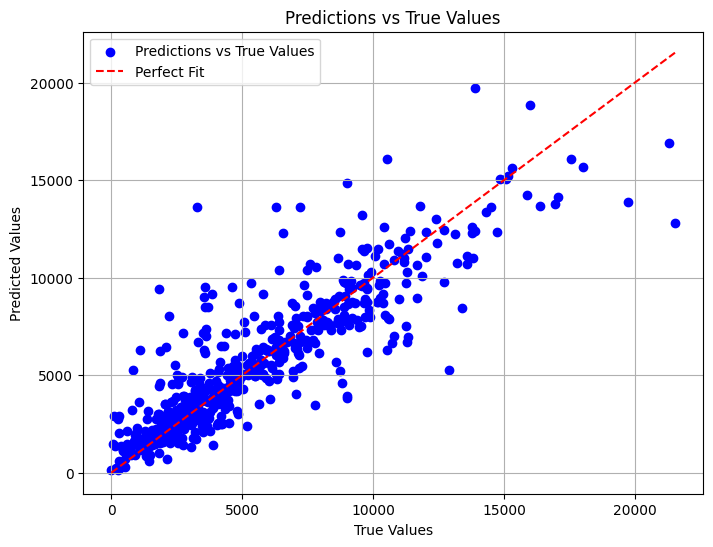

In [78]:
Y_pred = regressor.predict(X_test) 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))
Y_pred_self = Y_pred
plot_predictions_vs_truevals(Y_pred_self,Y_test)

In [79]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

1789.2198053772663